In [3]:
import timm
import torch
from PIL import Image
#import requests
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
import torchvision
from torchvision import transforms
#import matplotlib.pyplot as plt
import torch.nn as nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = 'cpu'

In [7]:
model = timm.create_model('vgg19', pretrained=True)

In [8]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [15]:

# Load pretrained model
#model = timm.create_model('resnet18', pretrained=True)



model = timm.create_model('mobilenetv3_small_050.lamb_in1k', pretrained=False)
model = nn.Sequential(*list(model.children())[:-1], nn.Linear(1024, 18))

#load checkpoint
checkpoint = torch.load('/zpool/vladlab/active_drive/vayzenb/mobilenetv3_small_050.lamb_in1k_modeling_images_best_1.pth.tar')
model = model.to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()
class_type = 'custom'

### Labeling an image

In [23]:
model = model.cpu()

# Get model specific transforms
config = resolve_data_config({}, model=model)
transform = create_transform(**config)


image_path = '/zpool/vladlab/data_drive/stimulus_sets/modeling_images/train/bear/bear(3).png'

# Load from local file
img = Image.open(image_path)

# Convert to RGB if needed
img = img.convert('RGB')

# Apply transforms
tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Run inference
with torch.no_grad():
    outputs = model(tensor)
    probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

# Get top prediction
top_prob, top_class = torch.topk(probabilities, 1)

if class_type == 'imagenet':
    # Load ImageNet class labels
    url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
    try:
        response = requests.get(url)
        image_classes = [line.strip() for line in response.text.splitlines()]
        predicted_label = image_classes[top_class.item()]
    except:
        # Fallback if can't load class names
        predicted_label = f"Class {top_class.item()}"

elif class_type == 'custom':
    # Use custom class names
    image_classes = ['airplane', 'apple', 'avocado', 'bear', 'binoculars', 'bread', 'butterfly', 'car', 'cat', 'corn', 'cow', 'dog', 'house', 'lawnmower', 'mushroom', 'pineapple', 'snail', 'teapot']
    predicted_label = image_classes[top_class.item()]

confidence = top_prob.item()


print(predicted_label)

RuntimeError: a Tensor with 1024 elements cannot be converted to Scalar

In [25]:
model = nn.Sequential(*list(model.children())[:-1])

tensor = tensor.to('cpu')
output = model(tensor)

In [26]:
bear_tensor = output.detach().cpu().numpy()
print(bear_tensor.shape)

(1, 288, 1, 1)


In [22]:
output.shape

(1, 1024, 1, 1)

In [22]:
image_classes = ['airplane', 'apple', 'avocado', 'bear', 'binoculars', 'bread', 'butterfly', 'car', 'cat', 'corn', 'cow', 'dog', 'house', 'lawnmower', 'mushroom', 'pineapple', 'snail', 'teapot']

In [5]:
img_dir = '/zpool/vladlab/data_drive/stimulus_sets/modeling_images/train/'
#create transform
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
        
                                             std=[0.229, 0.224, 0.225])])
train_dataset = torchvision.datasets.ImageFolder(img_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers = 4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.3410363].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.622571].
Clipping input

torch.Size([32, 3, 224, 224])


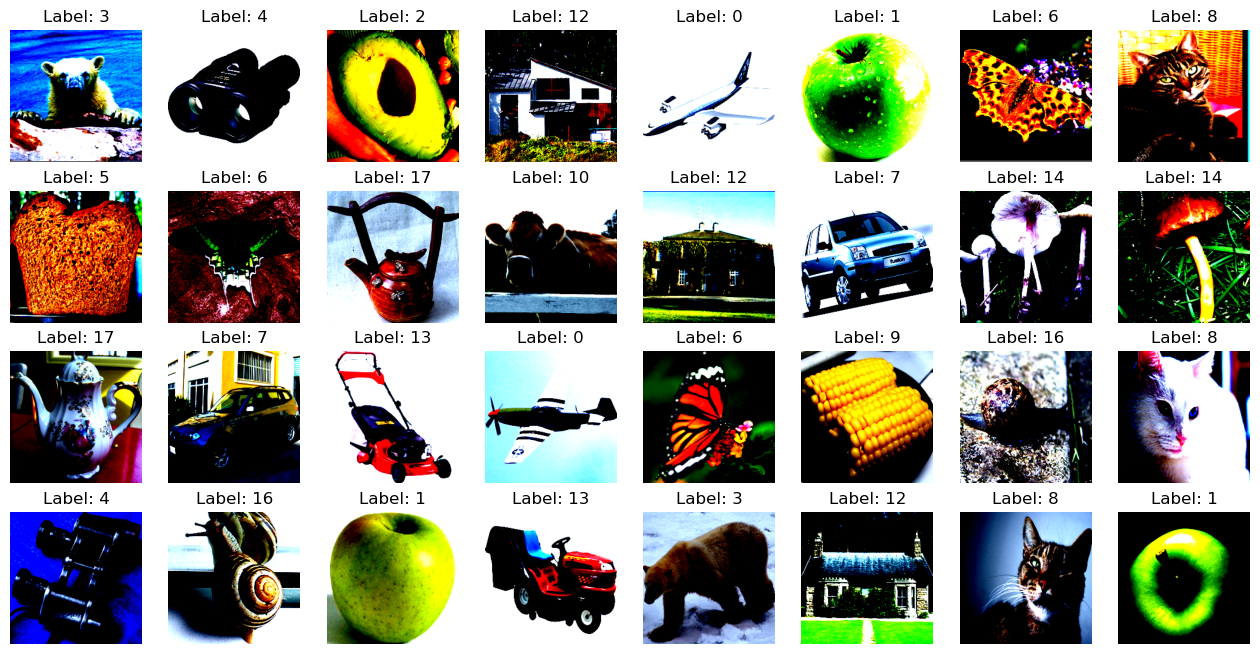

In [13]:
images, labels = next(iter(trainloader))

# Check shapes
print(images.shape)  # Should be [32, 3, 224, 224

'''loop through images and show each individually'''
#create img_list
img_list = [images[i] for i in range(len(images))]
label_list = [labels[i] for i in range(len(labels))]

#create subplot to show images with labels at the title of each subplot
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    if i < len(img_list):
        img = img_list[i]
        label = label_list[i]
        ax.imshow(img.permute(1, 2, 0))  # Change from [C, H, W] to [H, W, C] for plt
        ax.set_title(f'Label: {label.item()}')
        ax.axis('off')  # Hide axes



### Test model autoencoder

In [49]:
model = timm.create_model('resnet50', pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])
model = model.to(device)
model.eval()
decoder = nn.Sequential(nn.ReLU(),  #initialize decoder with ReLU activation
    nn.ConvTranspose2d(2048, 3, 224)) #create 2D transposed convolutional layer

decoder = decoder.to('cuda:0')
checkpoint = torch.load(f'/zpool/vladlab/active_drive/vayzenb/vlad-lab/weights/resnet50_modeling_images_25_1.pth.tar')

decoder.load_state_dict(checkpoint['state_dict'])
decoder.eval()

#create transform

transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])

#inverse normalization for reconstruction
inv_normalize = transforms.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],std=[1/0.229, 1/0.224, 1/0.225])

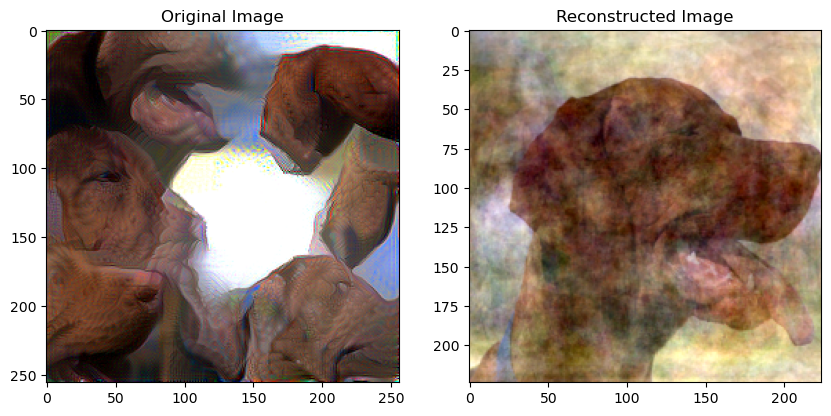

In [50]:
image_path = '/zpool/vladlab/data_drive/stimulus_sets/modeling_images/train/dog/dog(3).png'

image_path = '/zpool/vladlab/data_drive/stimulus_sets/GLINT_stimuli/stimuli_final_no_masks/scrambled/animate/dog/dog(3).png'

#apply transform to image
img = Image.open(image_path)
img = img.convert('RGB')
img_t = transform(img).unsqueeze(0).to(device)

# Get features from the model
with torch.no_grad():
    encoder_out = model(img_t)
    encoder_out = encoder_out.view(encoder_out.size(0), encoder_out.size(1), 1, 1)

    # Reconstruct image from features
    reconstructed_img = decoder(encoder_out)
    

    # Inverse normalize the reconstructed image
    reconstructed_img = inv_normalize(reconstructed_img.squeeze(0)).clamp(0, 1)

    # Convert tensor to PIL image for visualization
    reconstructed_img_pil = transforms.ToPILImage()(reconstructed_img.cpu())

    # plot
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')

    ax[1].imshow(reconstructed_img_pil)
    ax[1].set_title('Reconstructed Image')

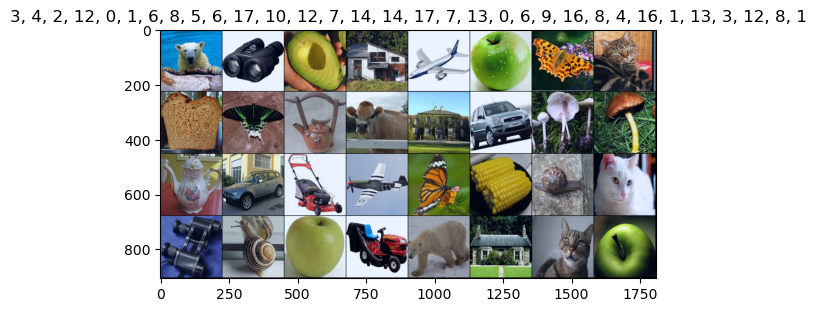

In [14]:


'''show images in grid'''
grid_img = torchvision.utils.make_grid(images, nrow=8, padding=2, normalize=True)

plt.imshow(grid_img.permute(1, 2, 0))  # Change from [C, H, W] to [H, W, C] for plt

#add labels as titles
plt.title(', '.join([str(label.item()) for label in labels]))


plt.show()


